In [1]:
### from
###
### https://semidanrobaina.com/blog/posts/closed-form-solution-to-michaelis-menten
###




import numpy as np
from scipy.special import lambertw
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def W(z):
    return np.real(lambertw(z, k=0))

In [3]:
# Define constants and parameters
S_0 = 15 # mM
E_0 = 0.05 # mM
K_cat = 30 # s^-1
v_max = K_cat * E_0 # mmol.L^-1.s^-1
k_1 = 5.5 # s^-1
k_minus_1 = 0.01 # s^-1
K_M = (k_minus_1 + K_cat) / k_1
t_0, t_f, dt = 0, 25, 0.01
T = np.arange(t_0, t_f, dt)

# Define closed-form solutions
S = lambda t : K_M * W(S_0 / K_M * np.exp(1 / K_M * (-v_max * t + S_0)))
ES = lambda t, S : (E_0 * S(t)) / (K_M + S(t)) * (1 - np.exp(-(K_M + S(t)) * k_1 * t))
E = lambda t, ES : E_0 - ES(t, S)
P = lambda t, S, ES : S_0 - S(t) - ES(t, S)
v = lambda t, S : (v_max * S(t)) / (K_M + S(t))

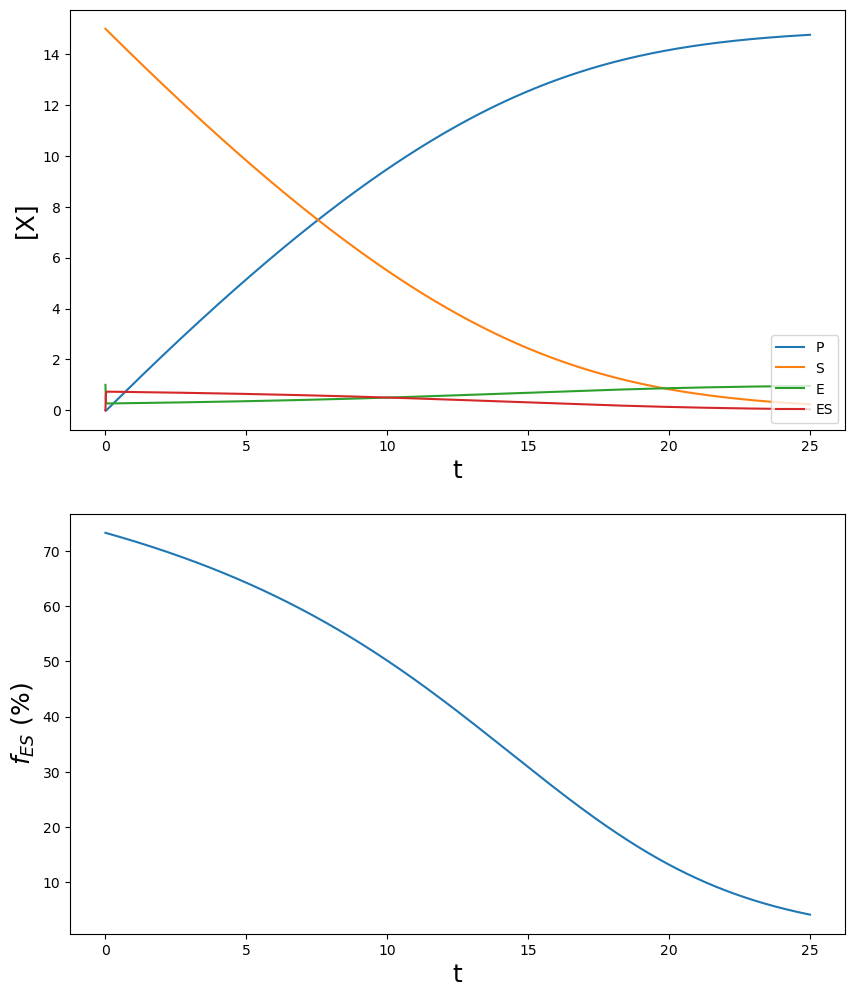

In [5]:
# Plot the figures!
plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.plot(T, [P(t, S, ES) for t in T], label='P')
plt.plot(T, [S(t) for t in T], label='S')
plt.plot(T, [1/E_0 * E(t, ES) for t in T], label='E')
plt.plot(T, [1/E_0 * ES(t, S) for t in T], label='ES')
plt.ylabel('[X]', fontsize=18)
plt.xlabel('t', fontsize=18)
plt.legend(loc='lower right')

plt.subplot(212)
plt.plot(T, [100 * v(t, S) / v_max for t in T])
plt.ylabel('$f_{ES}$ (%)', fontsize=18)
plt.xlabel('t', fontsize=18)

plt.show()